# Highest Hollywood Grossing Movies
----
This nootebook aims to answer the following questions based on the dataset ***highest holywood grossing movies***:
1. What is the highest-grossing film of all time? What was the gross in dollars ($)?
2. What is the average runtime of Warner Bros.’s movies?
3. If you were a great executive responsible for approving projects, which genre would you choose to maximize the most your profit?

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('highest_holywood_grossing_movies.csv')
data.info()

TypeError: required field "type_ignores" missing from Module

#### First Question
----

In [ ]:
sort_by_grossing = data.sort_values(['World Sales (in $)'],ascending=False)
sort_by_grossing.head(3)

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
6,6,Titanic (1997),A seventeen-year-old aristocrat falls in love ...,Paramount Pictures,"December 19, 1997",659363944,1542283320,2201647264,"['Drama', 'Romance']",3 hr 14 min,PG-13


#### Second Question
----

In [4]:
#data treatment -> total minutes
def time_conv(time: str):
    # Convert runtimes to minute
    time = time.split(' ')
    length = len(time)

    if length == 4:
        hour, minute = int(time[0]), int(time[2])
        return hour*60 + minute
    elif length == 2:
        minute = int(time[0])
        return minute*60

In [5]:
#Converting string runtime into minutes
data["Movie Runtime"] = data["Movie Runtime"].apply(time_conv)
data.head(3)

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",138,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",181,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",162,PG-13


In [6]:
#Counting warner bros movies 
warner_bros_movies = data[data['Distributor']=="Warner Bros."]
print("Total movies:\n")
print(warner_bros_movies["Distributor"].count())
total_movies = warner_bros_movies["Distributor"].count()

Total movies:

158


In [7]:
#Sum duration time in minutes from warner bros movies
total_duration_minutes = warner_bros_movies["Movie Runtime"].sum()
print("Total time(in minutes):\n")
print(total_duration_minutes)

Total time(in minutes):

19360


In [8]:
#Calculating average time in minutes
time_average = total_duration_minutes/total_movies
#print(time_average)
hours = time_average//60
minutes = time_average % 60
# seconds = time_average * 60

print("Warner Bros.'s movies average time:\n")
print("%d Hours %02d minutes" % (hours, minutes))

Warner Bros.'s movies average time:

2 Hours 02 minutes


#### Third Question
----

In [9]:
gb_genre = data.groupby('Genre')

In [10]:
most_sales_genre = gb_genre.sum().sort_values('World Sales (in $)', ascending=False)[:10]

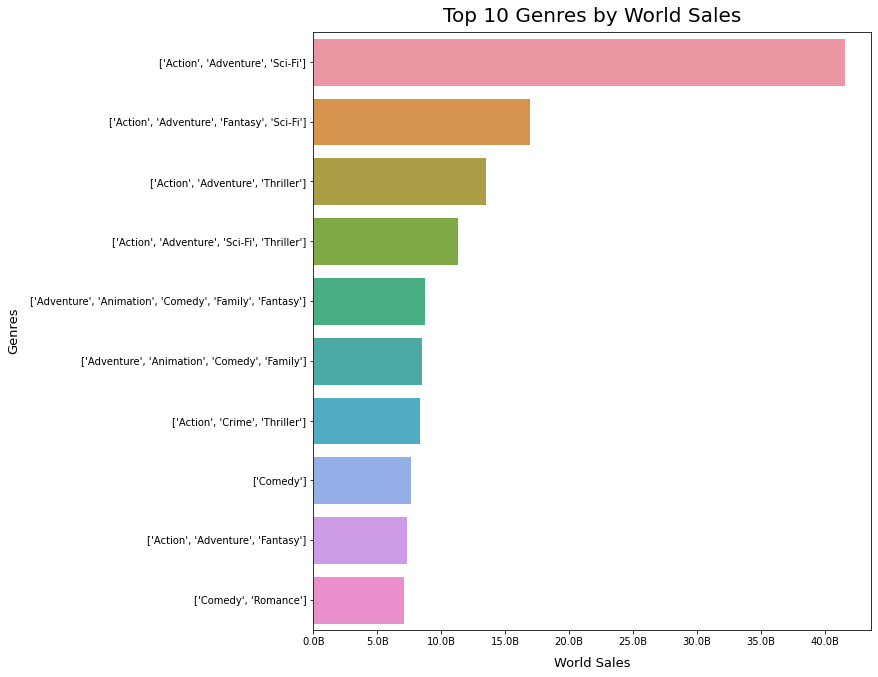

In [11]:
fig, ax = plt.subplots(figsize=(10, 11))

sns.set_theme(palette='Set2')
sns.barplot(ax=ax, x=most_sales_genre['World Sales (in $)'], y=most_sales_genre.index)

ax.set_title('Top 10 Genres by World Sales', fontsize=20, pad=10)
ax.set_xlabel('World Sales', fontdict={'fontsize': 13}, labelpad=10)
ax.set_ylabel('Genres', fontdict={'fontsize': 13}, labelpad=10)
ax.xaxis.set_major_formatter(lambda x, pos: f'{int(x)/1_000_000_000}B')

plt.show()

In [12]:
top_warner_world_sales = warner_bros_movies.sort_values('World Sales (in $)', ascending=False)
top_warner_world_sales.head(3)

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
42,42,Harry Potter and the Deathly Hallows: Part 2 (...,"Harry, Ron, and Hermione search for Voldemort'...",Warner Bros.,NaN,381409310,960912354,1342321665,"['Adventure', 'Fantasy', 'Mystery']",130,NaN
63,63,Aquaman (2018),"Arthur Curry, the human-born heir to the under...",Warner Bros.,NaN,335061807,813424079,1148485886,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",143,NaN
21,21,The Dark Knight Rises (2012),Eight years after the Joker's reign of anarchy...,Warner Bros.,"July 19, 2012",448139099,633003513,1081142612,"['Action', 'Crime', 'Drama']",164,PG-13
